In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("liver_patient.csv")

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.describe(include="all")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### Albumin_and_Globulin_Ratio has 4 null values.Lets check if it is important feature or not before applying something on these null values

## Data Visualization

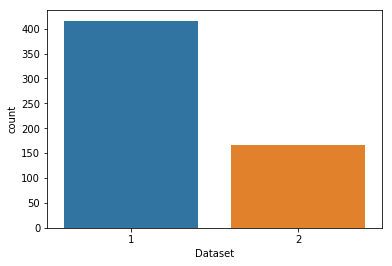

In [7]:
sns.countplot(data=data, x="Dataset")


In [8]:
p,n = data["Dataset"].value_counts()
p,n

(416, 167)

## % of liver patient in the dataset 71.3550600343
## % of non liver patient in the dataset 28.6449399657

# Bias in the dataset

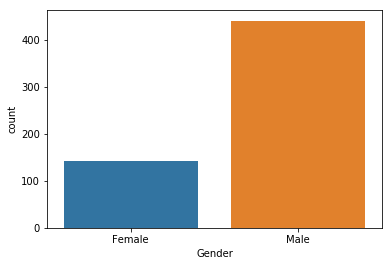

In [9]:
sns.countplot(data=data,x="Gender")

In [10]:
m,f = data['Gender'].value_counts()
total = 583
print("% of male in the dataset", m/total*100)
print("% of female in the dataset", f/total*100)

% of male in the dataset 75.64322469982847
% of female in the dataset 24.356775300171527


## % of male in the dataset 75.6432246998
## % of female in the dataset 24.3567753002
# To observe % of liver patient of different gender

In [11]:
temp1 = data[(data['Gender'] == 'Male') & (data['Dataset'] == 1)].count()
mPatient = temp1['Dataset']
temp2 = data[(data['Gender'] == 'Female') & (data['Dataset'] == 1)].count()
fPatient = temp2['Dataset']
print("% of male patient ", mPatient/m*100)
print("% of female patient ", fPatient/f*100)

% of male patient  73.4693877551
% of female patient  64.7887323944


## % of male patient  73.4693877551
## % of female patient 64.7887323944

# Might be because male consume more alcohol.

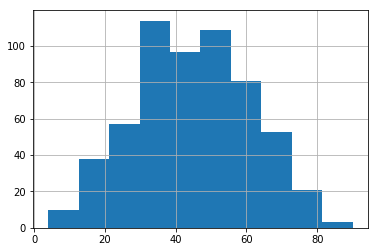

In [12]:
data['Age'].hist()
plt.show()

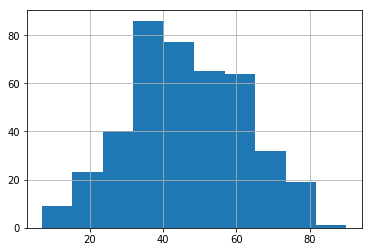

In [13]:
# Age df having liver disease (datas
Magedf = data[(data['Dataset']==1)]['Age'].to_frame()
Magedf['Age'].hist()

<img src="liverDisease.png",width=500,height=500>

##  Histogram fro our dataset and above researched graph showing cause of death by age: proportion of all deaths in each age group, England, 2001–2013 shows similar behaviour. 

## Also a lot of graphs by different countries around the world has similar behaviour

In [14]:
corr = data.corr()

In [15]:

corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


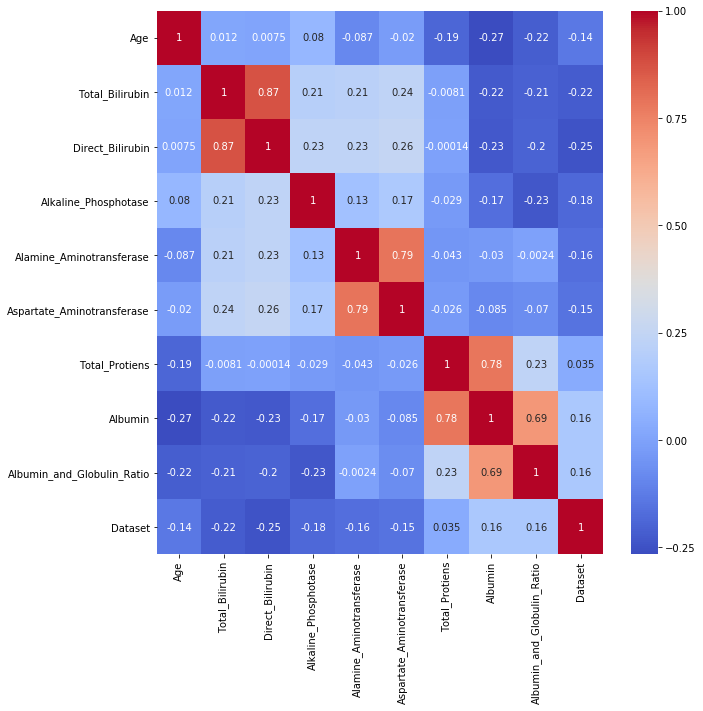

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",annot=True)


## These pairs have greater correlation between the attributes
    Direct_Bilirubin & Total_Bilirubin
    Alamine_Aminotransferase & Aspartate_Aminotransferase
    Total_Proteins & Albumin

In [17]:

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [18]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ..., 
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [19]:
from sklearn.preprocessing import Imputer
mvImp = Imputer(missing_values='NaN', strategy='median')
X[:,9:10] = mvImp.fit_transform(X[:,9:10])


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

X

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=2)



In [21]:
X

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ..., 
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

classifier_logis = LogisticRegression()
classifier_logis.fit(X_train,Y_train)
y_pred_logis = classifier_logis.predict(X_test)
cm_logis = confusion_matrix(Y_test,y_pred_logis)
print(cm_logis)
accuracy_logis = accuracy_score(Y_test,y_pred_logis)
print('The accuracy of LogisticRegression is : ', str(accuracy_logis*100) , '%')    
cm1=cm_logis
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)




[[82  3]
 [23  9]]
The accuracy of LogisticRegression is :  77.7777777778 %
Sensitivity :  0.964705882353
Specificity :  0.28125


In [23]:
import scipy

In [24]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='rbf', gamma='auto')
classifier_svc.fit(X_train,Y_train)
y_pred_svc = classifier_svc.predict(X_test)
cm_svc = confusion_matrix(Y_test,y_pred_svc)
print(cm_svc)
accuracy_svc = accuracy_score(Y_test,y_pred_svc)
print('The accuracy of SupportVectorClassification is : ', str(accuracy_svc*100) , '%')

cm1=cm_logis
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[85  0]
 [31  1]]
The accuracy of SupportVectorClassification is :  73.5042735043 %
Sensitivity :  0.964705882353
Specificity :  0.28125


In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knc = KNeighborsClassifier(n_neighbors=20)
classifier_knc.fit(X_train,Y_train)
y_pred_knc = classifier_knc.predict(X_test)
cm_knc = confusion_matrix(Y_test,y_pred_svc)
print(cm_knc)
accuracy_knc = accuracy_score(Y_test,y_pred_svc)
print('The accuracy of SupportVectorClassification is : ', str(accuracy_knc*100) , '%')

[[85  0]
 [31  1]]
The accuracy of SupportVectorClassification is :  73.5042735043 %


In [26]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train,Y_train)
y_pred_nb = classifier_knc.predict(X_test)
cm_nb = confusion_matrix(Y_test,y_pred_svc)
print(cm_nb)
accuracy_nb = accuracy_score(Y_test,y_pred_svc)
print('The accuracy of NB is : ', str(accuracy_knc*100) , '%')

[[85  0]
 [31  1]]
The accuracy of NB is :  73.5042735043 %


In [34]:
import pickle
pickle.dump(classifier_logis,open('final_model.sav','wb'))
# Test data of patient
test= X[1]
test


array([62, 1, 10.9, 5.5, 699, 64, 100, 7.5, 3.2, 0.74], dtype=object)

In [35]:
load_model = pickle.load(open('final_model.sav','rb'))
result = load_model.predict([test])
a = result[0]
a

1

In [36]:
load_model.predict_proba([test])

array([[ 0.98480472,  0.01519528]])